In [1]:
from src.data.dataloaders import GMC_DataLoader, NIH_DataLoader, ENV_DataLoader
from src.models.train import train
from src.

from torch import optim
import torch

%load_ext autoreload
%autoreload 2

In [ ]:
gmc_dataloader = GMC_DataLoader(batch_size=4,
                                shuffle=True, num_workers=0, pin_memory=True, stage = "train")

nih_dataloader = NIH_DataLoader(batch_size=4,
                                shuffle=True, num_workers=0, pin_memory=True, stage = "test")

In [6]:
train_loaders = [ENV_DataLoader(batch_size=4,
                                shuffle=True, 
                                num_workers=0, 
                                pin_memory=True, 
                                stage = "train", 
                                type = i+1)
                for i in range(2)]


test_loader = ENV_DataLoader(batch_size=4,
                            shuffle=True, 
                            num_workers=0, 
                            pin_memory=True, 
                            stage = "test")

### NIH 
Normal / Pneumonia
* Train : 50500 / 876
* Test : 9861 / 555

### GMC
* Train : 1341 / 3875
* Test : 234 / 390


## ENV1
PNEUMONIA = 90% NIH + 10% GMC = 876 NIH + 97 GMC = 973

NOT PNEUMONIA = 876 NIH + 97 GMC = 973

Total = 1946

## ENV2 
PNEUMONIA = 80% NIH + 20% GMC = 778 NIH + 195 GMC = 973

NOT PNEUMONIA =  778 NIH + 195 GMC

Total = 1946

## TEST_ENV
PNEUMONIA = 10% NIH + 90% GMC = 23 NIH + 234 GMC 

NOT PNEUMONIA = 23 NIH + 234 GMC

Total = 514

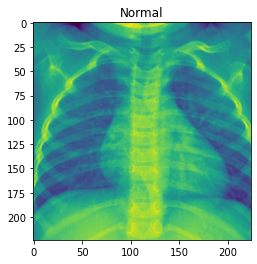

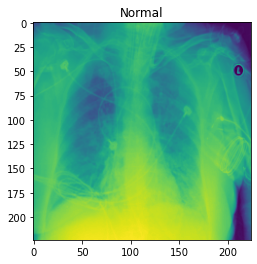

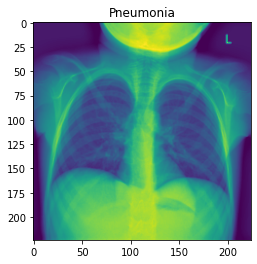

In [4]:
gmc_dataloader.show(iter = 1, type="NORMAL")
nih_dataloader.show(iter = 1, type="NORMAL")
env1_dataloader.show(iter = 1, type="PNEUMONIA")

In [ ]:
n_epochs = 20
irm = 3
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')

model = ...
optimizer = optim.Adam(model.parameters(), lr=0.01)
criterion = torch.nn.CrossEntropyLoss()

train(model, train_loaders, optimizer, criterion, irm, n_epochs, device)


In [32]:
train_loaders_iter = [iter(train_loader) for train_loader in train_loaders]
batch = next(train_loaders_iter[0])
batch[0].shape

torch.Size([4, 1, 224, 224])

In [34]:
batch[1]

tensor([[1.],
        [0.],
        [0.],
        [1.]])